In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import seaborn as sns

In [34]:
alg_label = ["Original",
             "Lqdags"]
        
queries_label = ["j3","j4","p2","p3","p4","s1","s2","s3","s4","t2","t3","t4","ti2","ti3","ti4","tr1","tr2"]

queries_title = ["J3","J4","P2","P3","P4","S1","S2","S3","S4","T2","T3","T4","Ti2","Ti3","Ti4","Tr1","Tr2"]

In [35]:
# box plots for each query
# TDO hacer un for para cada query y función y tamaño k
j3,j4,p2,p3,p4,s1,s2,s3,s4,t2,t3,t4,ti2,ti3,ti4,tr1,tr2 = [],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]
data = [j3,j4,p2,p3,p4,s1,s2,s3,s4,t2,t3,t4,ti2,ti3,ti4,tr1,tr2]

datasets = []
file = "results-nodes.csv"
print(file)

original = pd.read_csv(f'../../original/{file}',delimiter=';')
original = original.head(4)



lqdags = pd.read_csv(f'../../lqdags/{file}',delimiter=';')
lqdags.replace(0, np.nan, inplace=True)

datasets = [original,
               lqdags]

#   print(i)
for j,query in enumerate(queries_label):
    data[j] = [original[query],
                     lqdags[query]] 

results-nodes.csv


In [29]:
datasets[1]

,k,j3,j4,p2,p3,p4,s1,s2,s3,s4,t2,t3,t4,ti2,ti3,ti4,tr1,tr2
1,9954469,28875268,70179,1547227,15026981,196792,6698450,1209946,3323347,15945,1232618,4712051,64850,15982422,31999821,19901,70807,NaN
10,16539094,42523934,530097,6029388,28525433,566513,9548532,5863506,11633448,66515,3765879,19553495,228982,23988734,28392234,82060,285075,NaN
100,16542500,45090793,688643,7314148,37825470,788253,14802206,6665270,11685522,380657,5698729,20827002,569224,32932244,35409345,92198,291666,NaN
1000,17711929,48790865,871708,7706490,40851279,789124,10665876,6771197,11685522,514639,6159720,19398424,1345381,37651195,41773777,95009,333389,NaN


In [30]:
datasets[0]['k']

0       1
1      10
2     100
3    1000
Name: k, dtype: int64

In [36]:
# colors:
# https://matplotlib.org/stable/gallery/color/named_colors.html
#colors = ['hotpink','red','peru']#, 'lightsalmon', 'gold', 'dodgerblue', 'darkturquoise', 'mediumspringgreen', 'lime']
colors = ['red', 'fuchsia']#, 'darkturquoise', 'mediumspringgreen', 'lime']


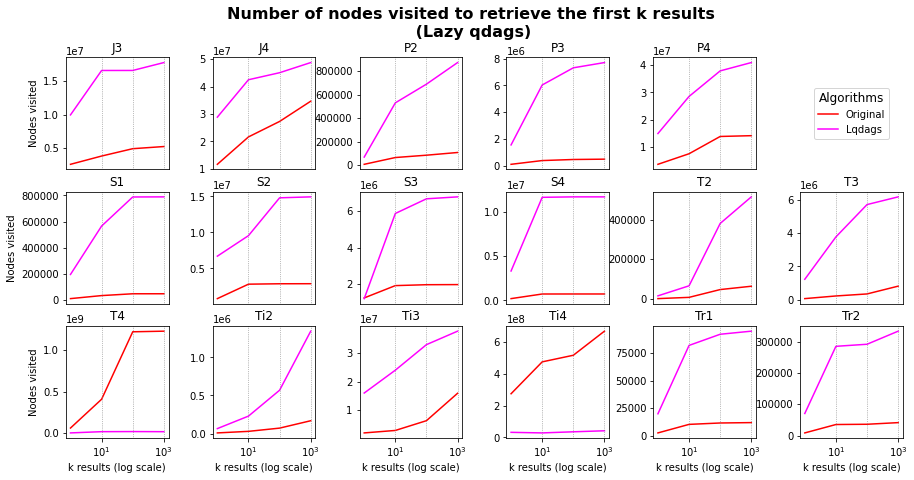

In [37]:
# Crear la figura
fig = plt.figure(figsize=(15, 7))

# Crear un GridSpec con la distribución deseada
gs = gridspec.GridSpec(3, 6, figure=fig, hspace=0.2, wspace=0.43)

# Añadir los subplots a la figura
j3 = fig.add_subplot(gs[0, 0])
j4 = fig.add_subplot(gs[0, 1])
p2 = fig.add_subplot(gs[0, 2])
p3 = fig.add_subplot(gs[0, 3])
p4 = fig.add_subplot(gs[0, 4])
color_legend = fig.add_subplot(gs[0, 5]) # Space for the legend
color_legend.axis('off')  # Hide the axis

s1 = fig.add_subplot(gs[1, 0])
s2 = fig.add_subplot(gs[1, 1])
s3 = fig.add_subplot(gs[1, 2])
s4 = fig.add_subplot(gs[1, 3])
t2 = fig.add_subplot(gs[1, 4])
t3 = fig.add_subplot(gs[1, 5])

t4 = fig.add_subplot(gs[2, 0])
ti2 = fig.add_subplot(gs[2, 1])
ti3 = fig.add_subplot(gs[2, 2])
ti4 = fig.add_subplot(gs[2, 3])
tr1 = fig.add_subplot(gs[2, 4])
tr2 = fig.add_subplot(gs[2, 5])

j3.set_ylabel('Nodes visited')
s1.set_ylabel('Nodes visited')
t4.set_ylabel('Nodes visited')

t4.set_xlabel('k results (log scale)')
ti2.set_xlabel('k results (log scale)')
ti3.set_xlabel('k results (log scale)')
tr1.set_xlabel('k results (log scale)')
tr2.set_xlabel('k results (log scale)')
ti4.set_xlabel('k results (log scale)')

# Adjusting the limits for ti4 (or use log scale)
#ti4.set_yscale('log')  # Use logarithmic scale if the difference is large

#tr1.set_ylabel('Time (ms)')
# plot type_fun = 0
#type_fun=0

# Establecer límites específicos para cada subplot si es necesario
#j3.set_ylim(5, 8)
#s1.set_ylim(1, 30)
#t4.set_ylim(1, 1000)


for i,query in enumerate([j3,j4,p2,p3,p4,s1,s2,s3,s4,t2,t3,t4,ti2,ti3,ti4,tr1,tr2]):
    for j, alg in enumerate(alg_label):
        query.plot(datasets[0]['k'], data[i][j], marker='', color=colors[j], label=alg_label[j])
    query.set_xscale('log')
    #query.set_yscale('log')
    query.set_title(queries_title[i])
    query.axvline(x=10, color='gray', linestyle=':', linewidth=0.7)
    query.axvline(x=100, color='gray', linestyle=':', linewidth=0.7)
    query.axvline(x=1000, color='gray', linestyle=':', linewidth=0.7)
    #if(query != j3 and query != s1 and query != t4):
    #    query.axes.get_yaxis().set_visible(False)
    if(query != t4 and query != ti2 and query != ti3 and query != ti4 and query != tr1 and query != tr2):
        query.axes.get_xaxis().set_visible(False)
        
handles, labels = j3.get_legend_handles_labels()

color_legend.legend(
    handles,
    labels,
    loc='center',
    fontsize=10,  # Increase font size for the legend
    title='Algorithms',  # Add title
    title_fontsize=12  # Set font size for the title
)

# Global ylabel
#fig.text(0.07, 0.6, 'Number of nodes visited', va='center', rotation='vertical', fontsize=20)

# Add a title to the entire figure
fig.suptitle('Number of nodes visited to retrieve the first k results\n (Lazy qdags)', fontsize=16, fontweight='bold')


plt.savefig('/Users/asugomez/Documentos/Magister/Tesis/tesisQdags/imagenes/lqdags_variablek-nodes.pdf')

plt.show()
 

In [16]:
## SECOND SCENARIO --> V1000

In [38]:

alg_label = ["Original",
            "Lqdags"]
queries_title_v1000 = ["J3","J4","P2","P3","P4","S3","T2","T3","T4","Ti2","Ti3"] #"S3","T3","Ti4 (log scale)"
queries_label_v1000=["j3","j4","p2","p3","p4","s3","t2","t3","t4","ti2","ti3"] # "s3", "t3","ti4"

In [39]:
j3,j4,p2,p3,p4,s1,s2,s3,s4,t2,t3,t4,ti2,ti3,ti4,tr1,tr2 = [],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]
data_v1000 = [j3,j4,p2,p3,p4,s1,s2,s3,s4,t2,t3,t4,ti2,ti3,ti4,tr1,tr2]
datasets_v1000 =[]

file = "results-v1000-nodes.csv"
#print(file)

original = pd.read_csv(f'../../query1000results/original/{file}',delimiter=';')
original = original.head(4)
# Drop columns where all values are zero
original = original.loc[:, (original != 0).any(axis=0)]

lqdags = pd.read_csv(f'../../query1000results/lqdags/{file}',delimiter=';')
# Drop columns where all values are zero
lqdags = lqdags.loc[:, (lqdags != 0).any(axis=0)]

lqdags.replace(0, np.nan, inplace=True)


datasets_v1000 = [original,
                     lqdags]

#   print(i)
for j,query in enumerate(queries_label_v1000):
    data_v1000[j] = [original[query],
                     lqdags[query]]
        

In [23]:
datasets_v1000[1]

,k,j3,j4,p2,p3,p4,s3,t2,t3,t4,ti2,ti3,ti4
0,1,399115,640549,1319,565353,13034630,42,227,528.0,1626,32438,19426557.0,15972982.0
1,10,449016,769318,10497,1027305,109246798,1274,19725,13828.0,132634,51275,27334111.0,18793982.0
2,100,1602387,9529633,95085,1671720,112497409,15341,682348,4815895.0,357765,205364,30323083.0,NaN
3,1000,12611844,34552548,641471,3102109,112497409,158262,1275864,NaN,7396317,2718322,NaN,NaN


In [14]:
# colors:
# https://matplotlib.org/stable/gallery/color/named_colors.html
#colors = ['hotpink','red','peru']#, 'lightsalmon', 'gold', 'dodgerblue', 'darkturquoise', 'mediumspringgreen', 'lime']
colors = ['red', 'fuchsia']#, 'darkturquoise', 'mediumspringgreen', 'lime']


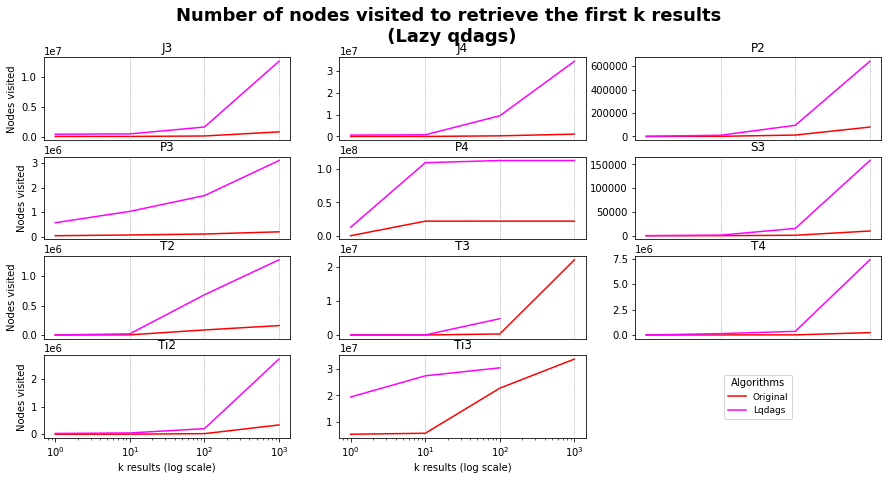

In [40]:
# Crear la figura
fig = plt.figure(figsize=(15, 7))

# Crear un GridSpec con la distribución deseada
gs = gridspec.GridSpec(4, 3, figure=fig, hspace=0.2, wspace=0.2)

# Añadir los subplots a la figura
j3 = fig.add_subplot(gs[0, 0])
j4 = fig.add_subplot(gs[0, 1])
p2 = fig.add_subplot(gs[0, 2])

p3 = fig.add_subplot(gs[1, 0])
p4 = fig.add_subplot(gs[1, 1])
s3 = fig.add_subplot(gs[1, 2])

t2 = fig.add_subplot(gs[2, 0])
t3 = fig.add_subplot(gs[2, 1])
t4 = fig.add_subplot(gs[2, 2])


ti2 = fig.add_subplot(gs[3, 0])
ti3 = fig.add_subplot(gs[3, 1])
color_legend = fig.add_subplot(gs[3, 2]) # Space for the legend
color_legend.axis('off')  # Hide the axis

j3.set_ylabel('Nodes visited')
p3.set_ylabel('Nodes visited')
t2.set_ylabel('Nodes visited')
ti2.set_ylabel('Nodes visited')

ti2.set_xlabel('k results (log scale)')
ti3.set_xlabel('k results (log scale)')
# Adjusting the limits for ti4 (or use log scale)
#ti4.set_yscale('log')  # Use logarithmic scale if the difference is large

# Establecer límites específicos para cada subplot si es necesario
#j3.set_ylim(5, 8)
#s1.set_ylim(1, 30)
#t4.set_ylim(1, 1000)

for i,query in enumerate([j3,j4,p2,p3,p4,s3,t2,t3,t4,ti2,ti3]): #([j3,j4,p2,p3,p4,s1,s2,s3,s4,t2,t3,t4,ti2,ti3,ti4,tr1,tr2]):
    for j, alg in enumerate(alg_label):
        query.plot(datasets_v1000[0]['k'], data_v1000[i][j], marker='', color=colors[j], label=alg_label[j])
    query.set_xscale('log')
    #query.set_yscale('log')
    query.set_title(queries_title_v1000[i])
    query.axvline(x=10, color='gray', linestyle=':', linewidth=0.7)
    query.axvline(x=100, color='gray', linestyle=':', linewidth=0.7)
    query.axvline(x=1000, color='gray', linestyle=':', linewidth=0.7)
    #if(query != j3 and query != p2 and query != s3 and query != ti3 and query != t4):
    #    query.axes.get_yaxis().set_visible(False)
    if(query != ti2 and query != ti3):
        query.axes.get_xaxis().set_visible(False)
handles, labels = j3.get_legend_handles_labels()

color_legend.legend(
    handles,
    labels,
    loc='center',
    fontsize=9,  # Increase font size for the legend
    title='Algorithms',  # Add title
    title_fontsize=10  # Set font size for the title
)

# Global ylabel
#fig.text(0.07, 0.6, 'Number of nodes visited', va='center', rotation='vertical', fontsize=20)

# Add a title to the entire figure
fig.suptitle('Number of nodes visited to retrieve the first k results\n (Lazy qdags)', fontsize=18, fontweight='bold')


plt.savefig('/Users/asugomez/Documentos/Magister/Tesis/tesisQdags/imagenes/lqdags_variablek-v1000-nodes.pdf')

plt.show()
 